In [1]:
#Data set 2: Seoul alquiler de bicicletas
import pandas as pd

from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive'
df= pd.read_csv('SeoulBikeData.csv',sep=',',encoding= 'unicode_escape')
df.head()


Mounted at /content/gdrive
/content/gdrive/My Drive


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
#Realizar al menos tres gráficos (lineplot, scatterplot, histogramas, barchart, boxplot) usando la librería Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Bicicletas alquiladas')

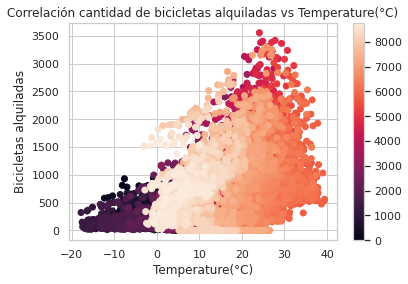

In [43]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df['Temperature(°C)'], df['Rented Bike Count'], c=df.index)
fig.colorbar(mapeo_colores)
ax.set_title('Correlación: cantidad de bicicletas alquiladas vs Temperature(°C)')
ax.set_xlabel('Temperature(°C)')
ax.set_ylabel('Bicicletas alquiladas')

Hay una correlación positiva entre las variables temperatura y cantidad de bicicletas alquiladas entre -20 grados hasta los 30 grados aproximadamente. Excedido los 30 grados, dicha correlación se pierde.

In [44]:
df_cantidad_alquilada_por_hora=df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()

print(df_cantidad_alquilada_por_hora)

    Hour  Rented Bike Count
0      0             197633
1      1             155557
2      2             110095
3      3              74216
4      4              48396
5      5              50765
6      6             104961
7      7             221192
8      8             370731
9      9             235784
10    10             192655
11    11             219311
12    12             255296
13    13             267635
14    14             276971
15    15             302653
16    16             339677
17    17             415556
18    18             548568
19    19             436229
20    20             390172
21    21             376479
22    22             336821
23    23             244961


Text(0.5, 0, 'Hour')

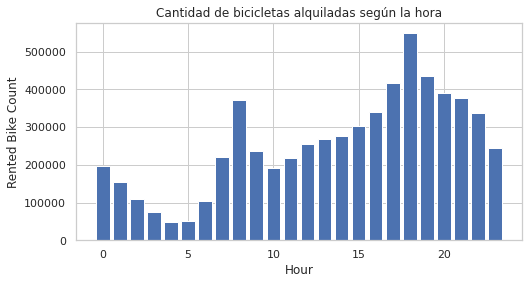

In [45]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(df_cantidad_alquilada_por_hora.index,df_cantidad_alquilada_por_hora['Rented Bike Count'])
ax.set_title('Cantidad de bicicletas alquiladas según la hora')
ax.set_ylabel('Rented Bike Count')
ax.set_xlabel('Hour')

Este grafico de barras muestra que la demanda de alquiler de bicicleta aumenta alrededor de las 8am y nuevamente por la tarde, con un pico a las 6 de la tarde, coindiendo con la hora pico.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df_cantidad_por_mes=df.groupby(df['Date'].dt.strftime('%B'))['Rented Bike Count'].sum().sort_values().reset_index()
print(df_cantidad_por_mes)

         Date  Rented Bike Count
0    February             264112
1     January             287244
2    December             311771
3       March             455037
4    November             493412
5   September             499326
6       April             556219
7      August             614190
8     October             626988
9         May             665948
10       July             691339
11       June             706728


In [46]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_cantidad_por_mes['Date'] = pd.Categorical(df_cantidad_por_mes['Date'], categories=new_order, ordered=True)
df_cantidad_por_mes_ordenado=df_cantidad_por_mes.sort_values('Date')

print(df_cantidad_por_mes_ordenado)

         Date  Rented Bike Count
1     January             287244
0    February             264112
3       March             455037
6       April             556219
9         May             665948
11       June             706728
10       July             691339
7      August             614190
5   September             499326
8     October             626988
4    November             493412
2    December             311771


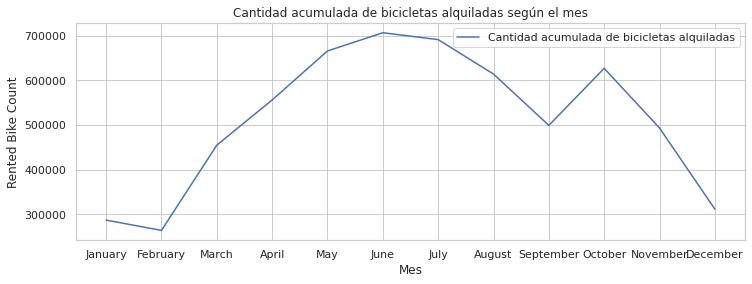

In [47]:
y=df_cantidad_por_mes_ordenado['Rented Bike Count']
x=df_cantidad_por_mes_ordenado['Date']
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x,y, label='Cantidad acumulada de bicicletas alquiladas')
ax.set_xlabel('Mes')                  
ax.set_ylabel('Rented Bike Count')
ax.set_title('Cantidad acumulada de bicicletas alquiladas según el mes')
ax.legend() 

Este grafico de lineas muestra la cantidad acumulada de bicicletas que se alquila según el mes. La demanda de bicicletas decae entre la finalizacion de otoño (octubre, noviembre diciembre) y el comienzo del invierno (diciembre, enero). 

In [ ]:
#Realizar al menos tres gráficos (lineplot, scatterplot, histogramas, barchart, boxplot) usando la librería Seaborn

In [17]:
import seaborn as sns

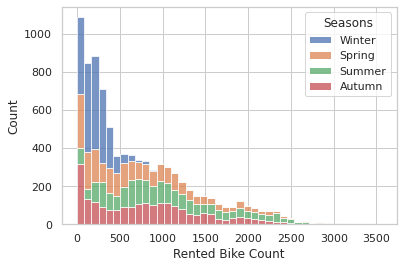

In [48]:
sns.histplot(data=df, x="Rented Bike Count", hue="Seasons", multiple="stack")



Grafica de histograma: En los primeros intervalos a la izquierda del grafico (cuando el conteo de alquiler de bicicletas es menor) tienen mayor peso las estaciones de invierno y otoño. Mientras que en los intervalos más a la derecha el peso de ejercen las estaciones de primavera y verano son mayores. 
A medida que el conteo de alquiler de bicicletas aumenta, la frecuencia es menor.

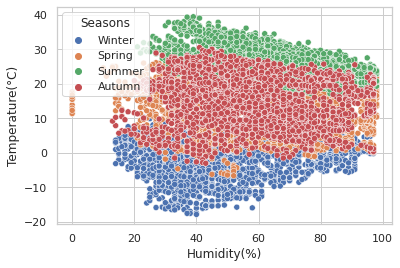

In [41]:
sns.scatterplot(data=df, x="Humidity(%)", y="Temperature(°C)",hue="Seasons")

A simple vista pareciera no haber correlación entre humedad y temperatura.

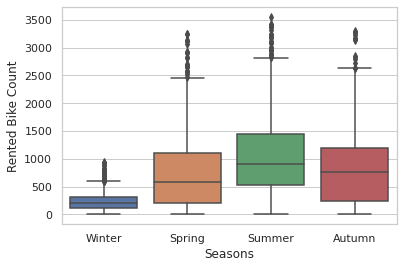

In [49]:
ax = sns.boxplot(x="Seasons", y="Rented Bike Count", data=df)

Boxplot por estación: La mediana entre las estaciones primavera, verano y otoño se encuentra entre los 500-1000.